In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import sys
import NR_a1_utils as utils 
from importlib import reload
import pandas as pd
reload(utils)

<module 'NR_a1_utils' from '/home/vbuchem/Documents/numerical_recipes/numerical_recipes/NR_a1_utils.py'>

In [3]:
seed = 42
print('Original seed:',seed)

Original seed: 42


mean = 1 k = 0
0.36787944117144233
mean = 5 k = 10
1.8871331317208108e-05
mean = 3 k = 20
4.618166957543835e-18
mean = 2.6 k = 40
6.717133577841115e-49
mean =  1 k =  0
[0.36787944117144233, inf, 0.36787944117144233, 0.04598493014643029, 0.0045417214959437326]


/home/vbuchem/Documents/numerical_recipes/numerical_recipes/NR_a1_utils.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  return (mean**k*np.exp(-mean))/fact


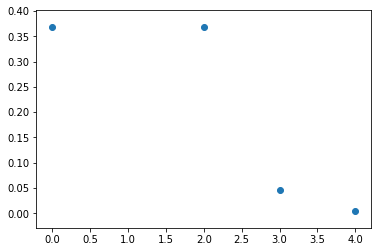

In [4]:

# Poisson distribution
a1 = [[1,0],[5,10],[3,20],[2.6,40]]#,[101,200]]
for i in range(len(a1)):
    print('mean =',a1[i][0],'k =',a1[i][1])
    print(utils.poisson_distribution(a1[i][0],a1[i][1]))
a1 = [[1,0],[5,10],[3,20],[2.6,40],[101,200]]
#a1 = [[101,200]]
#print('I hate my life')
#for i in range(len(a1)):
    #print(utils.poisson_distribution_new(a1[i][0],a1[i][1]))
    
x_test_p = np.linspace(0,4,5)
test_p = []
for i in range(len(x_test_p)):
    test_p.append(utils.poisson_distribution(1,int(x_test_p[i])))
print('mean = ',1,'k = ',int(x_test_p[0]))
print(test_p)
plt.scatter(x_test_p,test_p)
plt.show()


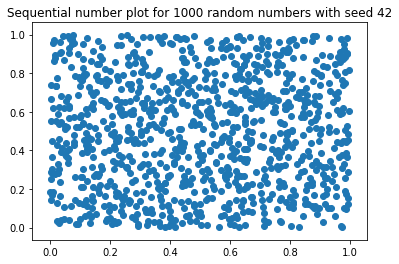

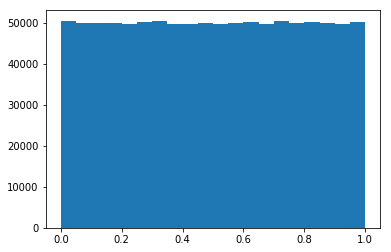

In [5]:
#--- 1.b ---
# RNG 
rng = utils.rng(seed)
# Scatter plot
N = 1000 
rand = rng.rand_num(N)
plt.scatter(rand[:(len(rand)-1)],rand[1:])
plt.title('Sequential number plot for {} random numbers with seed {}'.format(1000,seed))
plt.show()
# Histogram
N = 1000000
rand = rng.rand_num(N)
plt.hist(rand,bins=20,range=(0,1))
plt.show()

In [6]:
#--- 2.a --- 
a = rng.rand_num(1,min=1.1,max=2.5)
b = rng.rand_num(1,min=0.5,max=2)
c = rng.rand_num(1,min=1.5,max=4)
f = lambda x: 4*np.pi* (x**(a-1))/(b**(a-3)) *np.exp(-(x/b)**c)
f_int = utils.romber_int(f,0,5)
A = 1/f_int 
print('A = {}; a,b,c = {},{},{}'.format(A,float(a),float(b),float(c)))
#A = 0.03

A = 0.030593520989952466; a,b,c = 1.1903851299778927,1.4978073527317217,1.548543135201585


In [7]:
#--- 2.c --- 
n = lambda x: A*100*(x/b)**(a-3)*np.exp(-(x/b)**c)
x = b
dndx = utils.ridders_diff(n,np.array([b]))
dndx_analitic = lambda x: (A*100) * (((a-3)*(x/b)**(a-4)*np.exp(-(x/b)**c))/b - ((c*np.exp(-(x/b)**c)*(x/b)**(a+c-4))/b)) 
dndx_an = dndx_analitic(x)
print('dn/dx at x = b: analytic = {0:.12f}; numerical = {1:.12f}'.format(float(dndx_an),float(dndx)))


dn/dx at x = b: analytic = -2.523365429047; numerical = -2.523365429056


/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


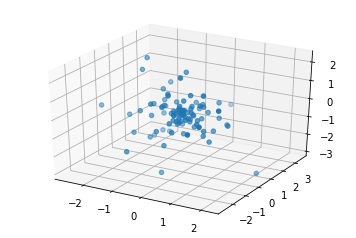

In [8]:
#--- 2.d --- 
N = 100
xmax = 5
# Drawing random samples from n(x)
pn = lambda x: (n(x)*4*np.pi*x**2)/100
x_p = np.linspace(0,xmax,200)
g = np.max(pn(x_p)[1:])+0.01
samples = utils.rejection_sampler(N,pn,5,g,rng)
r = samples[0]
# Generating random angles: 
phi = rng.rand_num(N,min=0,max=2*np.pi)
theta = np.arccos(2*rng.rand_num(N)-1)
x,y,z = r*np.sin(theta)*np.cos(phi),r*np.sin(theta)*np.sin(phi),r*np.cos(theta)
# Plotting positions for N galaxies
ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(x,y,z)
plt.show()

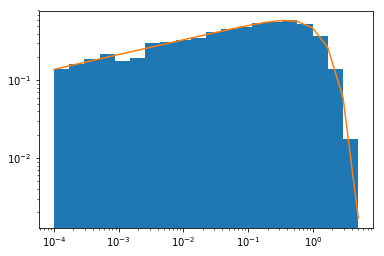

In [9]:
#--- 2.e --- 
N = 100000
samples = utils.rejection_sampler(N,pn,5,g,rng)
r = samples[0]
bins = np.logspace(np.log10(1e-4),np.log10(xmax),num=21)
plt.hist(r,bins=bins,density=True)
plt.plot(bins,pn(bins))
plt.yscale('log')
plt.xscale('log')
plt.show()

/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


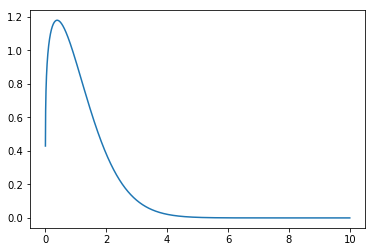

/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


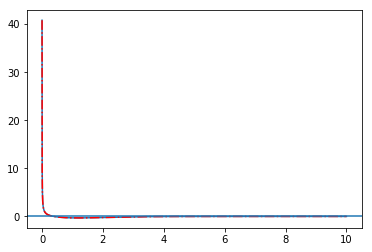

0.3869184059800736
Roots: 0.005325620802258033 1.5775751090955072


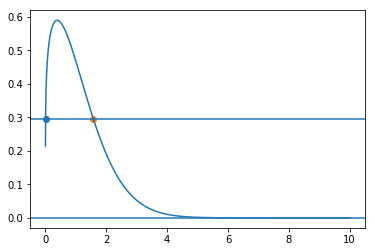

In [10]:
reload(utils)
#--- 2.f --- 
x = np.linspace(0,xmax*2,10000)
plt.plot(x,2*pn(x))
#plt.yscale('log')
#plt.xscale('log')
plt.show()

dpndx = utils.ridders_diff(pn,x)
dpndx_analytic = lambda x: A*4*np.pi*(np.exp(-(x/b)**c)*(((a-1)*b**(3-a)*x**(a-2))-(c*b**(2-a)*x**(a-1)*(x/b)**(c-1))))

plt.plot(x,dpndx)
plt.plot(x,dpndx_analytic(x),color='r',linestyle='-.')
plt.axhline(y=0)
plt.show()

dpndx_0 = float(utils.NewRaph_rootfinder(dpndx_analytic,1e-4,1,rng))
print(dpndx_0)
new_floor = float(pn(dpndx_0)/2)
pn_new_floor = lambda x: pn(x) - new_floor
root1 = float(utils.NewRaph_rootfinder(pn_new_floor,1e-4,dpndx_0,rng))
root2 = float(utils.NewRaph_rootfinder(pn_new_floor,dpndx_0,5,rng))
print('Roots:', root1,root2)
plt.scatter(root1,new_floor)
plt.scatter(root2,new_floor)
plt.plot(x,pn(x))
plt.axhline(y=0)
plt.axhline(y=new_floor)
plt.show()

In [11]:
reload(utils)
#--- 2.g ---

# Manually remake bins (without plt.hist)
counts = np.zeros((len(bins)-1))
for i in r: 
    for j in range(len(bins)-1):
        if i < bins[j+1] and i > bins[j]:
            counts[j] += 1
r_list = []
r_halo_distrib = np.zeros((1000))
for i in range(len(r)):
    if r[i] < bins[utils.arg_max(counts)+1] and r[i] > bins[utils.arg_max(counts)]:
        r_list.append(r[i])
        r_halo_distrib[i//100] += 1
mean = sum(r_halo_distrib)/len(r_halo_distrib)
print(mean)
halo_bins = np.linspace(10,45,36)
print(halo_bins)
poissd = []
for i in range(len(halo_bins)):
    poissd.append(utils.poisson_distribution(round(mean),int(halo_bins[i])))
print(poissd)
print(utils.poisson_distribution(mean,25))
#plt.hist(r_halo_distrib,halo_bins,density=True)
#plt.plot(halo_bins,poissd)
#plt.show()
sr = utils.selection_sort(r_list)
# NEED TO FIX POISSON

26.098
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]
[2.0684825230931427e-07, 1.8752116747681962e-07, 1.5535005962096348e-07, 1.1847884056301514e-07, 8.370731463578952e-08, 5.508370641269566e-08, 3.392008197561663e-08, 1.9626853503271985e-08, 1.0709844104891726e-08, 5.529164169348469e-09, 2.7085596903949925e-09, 1.2622746747127978e-09, 5.609609652744209e-10, 2.3823678241081694e-10, 9.688036300032184e-11, 3.77916737714919e-11, 1.4164794957887561e-11, 5.109089028063325e-12, 1.7758726437683534e-12, 5.956452087341963e-13, 1.9302073839593568e-13, 6.050041606071811e-14, 1.836184863075792e-14, 5.401503589047929e-15, 1.5415703393814012e-15, 4.272170265803022e-16, 1.150626576419449e-16, 3.0141496928614904e-17, 7.685377044863499e-18, 1.908726808543742e-18, 4.620543979118634e-19, 1.090915451043937e-19, 2.513634352809164e-20, 5.6555903678331266e-21, 1.243250766700964e-21, 2.67161385667565e-22]
3.76

Length: 26098, median: 1.2861689198005481, 16th: 1.0756693611362826, 84th: 1.5469696046080992


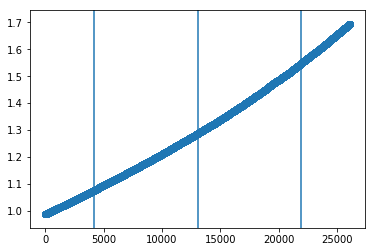

In [13]:
median = sr[int(len(sr)/2-0.5)]
p16th = sr[round(len(sr)*0.16)-1]
p84th = sr[round(len(sr)*0.84)-1]
print('Length: {}, median: {}, 16th: {}, 84th: {}'.format(len(sr),median,p16th,p84th))
x = np.linspace(0,len(sr)-1,len(sr))
plt.scatter(x,sr)
plt.axvline(x=int(len(sr)/2-0.5))
plt.axvline(x=round(len(sr)*0.16)-1)
plt.axvline(round(len(sr)*0.84)-1)
plt.show()

In [14]:
reload(utils)
#--- 2.h ---
al = np.linspace(1.1,2.5,15)
bl = np.linspace(0.5,2,16)
cl = np.linspace(1.5,4,26)
param = np.array((al,bl,cl))
Al = np.zeros([len(al),len(bl),len(cl)])
for i in range(len(al)):
    for j in range(len(bl)):
        for k in range(len(cl)):
            Al[i][j][k] = utils.A_calc(al[i],bl[j],cl[k])



In [15]:
reload(utils)
interpol = utils.trilinear_interpolator(al,bl,cl,Al,2.05,1.05,3.05)

In [16]:
reload(utils)
dat_path = 'C:/Users/Christiaan/Desktop/Numerical_Recipde/Data/'
dat = pd.read_csv('satgals_m15.txt',header=None,skiprows=3)
dat = utils.data_unpacker(dat)


In [52]:
a,b,c = 1,2,3
xs = [[a,b,c]]
for i in range(3):
    xs.append([float(a+rng.rand_num(1)),float(b+rng.rand_num(1)),float(c+rng.rand_num(1))])
xs = np.array(xs)
f = lambda xs : xs[:,0]**2+xs[:,1]-xs[:,2]
print(xs)
centroid = np.array([sum(xs[:,0]),sum(xs[:,1]),sum(xs[:,2])])/len(xs)
x_new = centroid + 1*(centroid-xs[-1])
print(centroid)
print(x_new)
    

[[1.         2.         3.        ]
 [1.99982557 2.07620549 3.75528273]
 [1.16169126 2.562649   3.56666587]
 [1.03750067 2.32542081 3.17915974]]
[1.29975438 2.24106882 3.37527708]
[1.56200808 2.15671684 3.57139443]


In [99]:
reload(utils)
a,b,c = 3,5,7
xs = [[a,b,c]]
f = lambda xs : xs[:,0]**2+xs[:,1]-xs[:,2]
f = lambda xs : xs[:,0]**2+2*xs[:,1]**2+3*xs[:,2]**2
min = utils.downhill_simplex(f,a,b,c)

-------------------
xs: [[3.         5.         7.        ]
 [3.00085783 5.53488088 7.13268277]
 [3.85120531 5.07371801 7.81717881]
 [3.63543228 5.92271704 7.55735524]]
fxs: [206.         222.90045111 249.64186496 254.71437693]
x_new: [[3.10831543 4.84294093 7.19625317]]
fx_new [211.92795756]
-------------------
xs: [[3.         5.         7.        ]
 [3.10831543 4.84294093 7.19625317]
 [3.00085783 5.53488088 7.13268277]
 [3.85120531 5.07371801 7.81717881]]
fxs: [206.         211.92795756 222.90045111 249.64186496]
x_new: [[2.62898398 5.1520519  6.75587857]]
fx_new [196.92451988]
Expanding
-------------------
xs: [[2.01787331 5.19121884 6.22522845]
 [3.         5.         7.        ]
 [3.10831543 4.84294093 7.19625317]
 [3.00085783 5.53488088 7.13268277]]
fxs: [174.22972634 206.         211.92795756 222.90045111]
x_new: [[2.56266545 4.74963944 6.64439942]]
fx_new [184.1295349]
-------------------
xs: [[2.01787331 5.19121884 6.22522845]
 [2.56266545 4.74963944 6.64439942]
 [3.         

In [100]:
print(min)


(array([-3.71274663,  4.95046833,  1.37194712]), 68.44547762420295)
